CMSE 202 group 15 sports 2 project by Zane Shango, Nick Mouaikel, and Tony Tedesco

For our project we decided to do machine learning and statistical analysis of college basketball. For our project we used data found on kaggle.com that contains statistical data on all NCAA division 1 basketball teams from the 2015 season to the abruptly ended 2020 season. For our project we decided to try to create a model that would predict the number of wins for each team and compare our results to the actual records of each team in the 2020 season. For this we used the 2015-2019 to act as our training data and the 2020 season to act as our testing data.

The variables we decided to use for this project are :
‘G’: Games Played
‘W’: Wins
'ADJOE': Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team
'ADJDE': Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team
'BARTHAG': Power Rating (Chance of beating an average Division I team)
'EFG_O': Effective Field Goal Percentage Shot
'EFG_D': Effective Field Goal Percentage Allowed
'TOR': Turnover Percentage Allowed (Turnover Rate)
'TORD': Turnover Percentage Committed (Steal Rate)
'ORB': Offensive Rebound Percentage
'DRB': Defensive Rebound Percentage
'FTR': Free Throw Rate (How often the given team shoots Free Throws)
'FTRD': Free Throw Rate Allowed
'2P_O': Two-Point Shooting Percentage
'2P_D': Two-Point Shooting Percentage Allowed
'3P_O': Three-Point Shooting Percentage
'3P_D': Three-Point Shooting Percentage Allowed
'ADJ_T': Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team
'WAB': Wins above bubble


For this project we encourperated the use of pandas, numpy, matplotlib.pyplot, seaborn and sklearn

The basis of our model is:
We conducted a linear regression of wins on the team stats to see which stats are most associated with wins.
Wins above bubble was most associated, but we decided to include all of the statistics in the prediction model.
We chose to use logistic regression to make our predictions.

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# load in datasets separately
cbb = pd.read_csv("cbb.csv")
cbb2020 = pd.read_csv("cbb20.csv")


# perform linear regression to get a rough idea which stats are most associated with wins
Y = cbb[['W']] # dependent variable is wins
# team stats are the independent variables
X = cbb[['ADJOE','ADJDE','BARTHAG','EFG_O','EFG_D','TOR','TORD','ORB','DRB','FTR','FTRD','2P_O','2P_D','3P_O','3P_D','ADJ_T','WAB']]
x_vars = list(X.columns.values) # make a list of independend variable names for dataframe

# perform linear regression
cbb_reg = LinearRegression()
cbb_reg.fit(X, Y)

# create dataframe to show coefficients and variables together
coefficients = pd.concat([pd.DataFrame({'Variable':X.columns}),pd.DataFrame(np.transpose(cbb_reg.coef_))], axis = 1)
coef_sum = coefficients.rename(columns={0:'Coefficient'}) # make new df after renaming coefficient column
coef_sum

,Variable,Coefficient
0,ADJOE,-0.184692
1,ADJDE,0.349388
2,BARTHAG,-2.871174
3,EFG_O,1.107144
4,EFG_D,-0.995670
5,TOR,-0.488813
6,TORD,0.760188
7,ORB,0.212232
8,DRB,-0.422526
9,FTR,0.023990



We made two functions, one that loops through all of the NCAA and one looping through only the “Power” conferences.
The functions take past and current season data and splits into feature and target train test without randomization.
We assigned the past data as the feature and target train set, and the current data as the feature and targe testing set.
The functions then pass these into a logistic regression to train the model, then predicts the target (Wins) for the current season using the feature test set.
After the predictions are made the function creates a dataframe for easy viewing.
The functions also calculate accuracy scores for each conference, and creates one dataframe with the accuracy scores to compare each conference’s prediction accuracy.


In [3]:
# function for predicting team wins in each conference

def total_win_predict(past_data, pred_data):
    confs = pred_data.CONF.unique() # conference names to loop through
    accuracy_scores = [] # empty list to be filled with accuracy scores for each conference
    for i in confs:
        # mask stats by conference i
        conf_past = past_data.loc[past_data['CONF'] == i] 
        conf_pred = pred_data.loc[pred_data['CONF'] == i]
        # create list of team names and actual wins for dataframes
        teams = list(conf_pred.TEAM)
        actual_wins = list(conf_pred.W)
        
        # split train and test data (past is train, current is test)
        # features are the stats, target is the number of wins
        features_train = conf_past[['ADJOE','ADJDE','BARTHAG','EFG_O','EFG_D','TOR','TORD','ORB','DRB','FTR','FTRD','2P_O','2P_D','3P_O','3P_D','ADJ_T','WAB']]
        target_train = conf_past[['W']]
        features_test = conf_pred[['ADJOE','ADJDE','BARTHAG','EFG_O','EFG_D','TOR','TORD','ORB','DRB','FTR','FTRD','2P_O','2P_D','3P_O','3P_D','ADJ_T','WAB']]
        target_test = conf_pred[['W']]
        
        # perform logistic regression
        log_reg = LogisticRegression().fit(features_train, target_train)
        # make win prediction based on trained logistic regression model
        wins_pred = log_reg.predict(features_test)
        # calculate accuracy (how close predicted wins are to actual for the conference (how many were predicted correctly))
        accuracy = accuracy_score(target_test, wins_pred)
        # add accuracy score to empty accuracy list
        accuracy_scores.append(accuracy)
        
        # create dataframe comparing predicted wins and actual wins 
        data = {'TEAM': teams, 'Predicted Wins': wins_pred, 'Actual Wins': actual_wins}
        conf_summary = pd.DataFrame.from_dict(data)
        
        print(i)
        print(conf_summary)
        print("Accuracy: \n", accuracy)
        
    # create dataframe with accuracy score for each conference
    accuracy_data = {'CONF': confs, 'Prediction Accuracy': accuracy_scores}
    accuracy_summary = pd.DataFrame.from_dict(accuracy_data)
    print(accuracy_summary)

In [6]:
total_win_predict(cbb, cbb2020)

C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConvers

B12
            TEAM  Predicted Wins  Actual Wins
0         Kansas              31           28
1         Baylor              24           26
2  West Virginia              27           21
3     Texas Tech              23           18
4       Oklahoma              20           19
5   Oklahoma St.              17           18
6          Texas              24           19
7            TCU              24           16
8       Iowa St.              24           12
9     Kansas St.              11           11
Accuracy: 
 0.1
WCC
               TEAM  Predicted Wins  Actual Wins
0           Gonzaga              22           31
1               BYU              17           24
2      Saint Mary's              17           25
3     San Francisco              22           22
4           Pacific              20           23
5        Pepperdine              17           16
6       Santa Clara              19           19
7  Loyola Marymount              22           11
8         San Diego          

C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConvers

SEC
               TEAM  Predicted Wins  Actual Wins
0          Kentucky              18           25
1           Florida              21           19
2            Auburn              28           25
3               LSU              21           21
4   Mississippi St.              21           20
5          Arkansas              19           20
6           Alabama              19           16
7    South Carolina              26           18
8         Tennessee              20           17
9           Georgia              25           16
10         Missouri              26           15
11      Mississippi              19           15
12        Texas A&M              18           16
13       Vanderbilt              19           11
Accuracy: 
 0.07142857142857142
MVC
                TEAM  Predicted Wins  Actual Wins
0      Northern Iowa              17           25
1     Loyola Chicago              23           21
2            Bradley              17           23
3        Indiana St.     

C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConvers

OVC
                      TEAM  Predicted Wins  Actual Wins
0                  Belmont              24           26
1               Murray St.              26           23
2              Austin Peay              22           21
3         Eastern Illinois              10           17
4            Tennessee St.              23           18
5         Eastern Kentucky              13           16
6         Jacksonville St.              10           13
7             Morehead St.              10           13
8         SIU Edwardsville              10            8
9           Tennessee Tech              10            9
10        Tennessee Martin              10            9
11  Southeast Missouri St.              10            7
Accuracy: 
 0.0
Slnd
                      TEAM  Predicted Wins  Actual Wins
0        Stephen F. Austin              16           28
1        Abilene Christian              19           20
2             Nicholls St.              21           21
3          Sam Houston 

C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConvers

In [4]:
# function predicting wins for only the power 6 conferences

def total_win_predict_POWER(past_data, pred_data):
    power_confs = np.array(['B12','B10','ACC','BE','P12','SEC'], dtype = object) # power conference names only to loop through
    accuracy_scores = [] # empty list to be filled with accuracy scores for each power conference
    for i in power_confs:
        conf_past = past_data.loc[past_data['CONF'] == i]
        conf_pred = pred_data.loc[pred_data['CONF'] == i]
        # create list of team names and actual wins for dataframes
        teams = list(conf_pred.TEAM)
        actual_wins = list(conf_pred.W)
        
        # split train and test data (past is train, current is test)
        # features are the stats, target is the number of wins
        features_train = conf_past[['ADJOE','ADJDE','BARTHAG','EFG_O','EFG_D','TOR','TORD','ORB','DRB','FTR','FTRD','2P_O','2P_D','3P_O','3P_D','ADJ_T','WAB']]
        target_train = conf_past[['W']]
        features_test = conf_pred[['ADJOE','ADJDE','BARTHAG','EFG_O','EFG_D','TOR','TORD','ORB','DRB','FTR','FTRD','2P_O','2P_D','3P_O','3P_D','ADJ_T','WAB']]
        target_test = conf_pred[['W']]
        
        # perform logistic regression
        log_reg = LogisticRegression().fit(features_train, target_train)
        # make win prediction based on trained logistic regression model
        wins_pred = log_reg.predict(features_test)
        # calculate accuracy (how close predicted wins are to actual for the conference (how many were predicted correctly))
        accuracy = accuracy_score(target_test, wins_pred)
        # add accuracy score to empty accuracy list
        accuracy_scores.append(accuracy)
        
        # create dataframe comparing predicted wins and actual wins
        data = {'TEAM': teams, 'Predicted Wins': wins_pred, 'Actual Wins': actual_wins}
        conf_summary = pd.DataFrame.from_dict(data)
        
        print(i)
        print(conf_summary)
        print("Accuracy: \n", accuracy)
    
    # create dataframe with accuracy score for each power conference
    accuracy_data = {'CONF': power_confs, 'Prediction Accuracy': accuracy_scores}
    accuracy_summary = pd.DataFrame.from_dict(accuracy_data)
    print(accuracy_summary)

In [5]:
power_pred = total_win_predict_POWER(cbb,cbb2020)

C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


B12
            TEAM  Predicted Wins  Actual Wins
0         Kansas              31           28
1         Baylor              24           26
2  West Virginia              27           21
3     Texas Tech              23           18
4       Oklahoma              20           19
5   Oklahoma St.              17           18
6          Texas              24           19
7            TCU              24           16
8       Iowa St.              24           12
9     Kansas St.              11           11
Accuracy: 
 0.1
B10
            TEAM  Predicted Wins  Actual Wins
0   Michigan St.              26           22
1       Ohio St.              27           21
2       Michigan              26           19
3       Penn St.              24           21
4      Wisconsin              15           21
5         Purdue              15           16
6       Maryland              19           24
7      Minnesota              26           15
8       Illinois              19           21
9        R

C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConvers

Outcome of our functions:
Our prediction results were varying by conference, although most of the accuracy was between .10 and .20 .
A good amount of the conferences however, had 0.00 for accuracy.
While many of the teams predicted wins didn’t match the actual wins, they were fairly close which is a good indication that the model is somewhat accurate.


Visualizations:

C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Text(0.5, 1.0, 'Wins above Bubble by Conf')

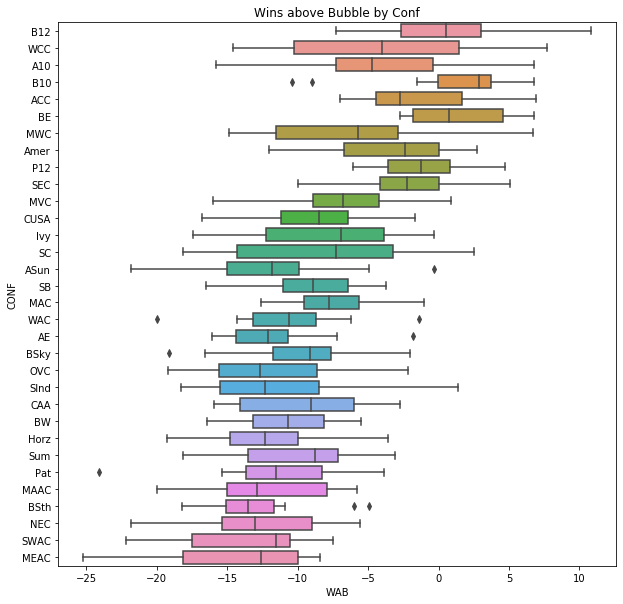

In [8]:
features_train = cbb[['ADJOE','ADJDE','BARTHAG','EFG_O','EFG_D','TOR','TORD','ORB','DRB','FTR','FTRD','2P_O','2P_D','3P_O','3P_D','ADJ_T','WAB']]
target_train = cbb[['W']]
features_test = cbb2020[['ADJOE','ADJDE','BARTHAG','EFG_O','EFG_D','TOR','TORD','ORB','DRB','FTR','FTRD','2P_O','2P_D','3P_O','3P_D','ADJ_T','WAB']]
target_test = cbb2020[['W']]

log_reg = LogisticRegression().fit(features_train, target_train)
wins_pred = log_reg.predict(features_test)
accuracy = accuracy_score(target_test, wins_pred)



import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.boxplot(cbb2020['WAB'],cbb2020['CONF'])
plt.title('Wins above Bubble by Conf')

This graph shows the average Wins above bubble (Cutoff between making the NCAA tournament and not making it). This graph shows that some conferences have a better chance at making the tournament than other conferences.


Text(0.5, 1, 'Wins predicted to make tournament')

<Figure size 720x720 with 0 Axes>

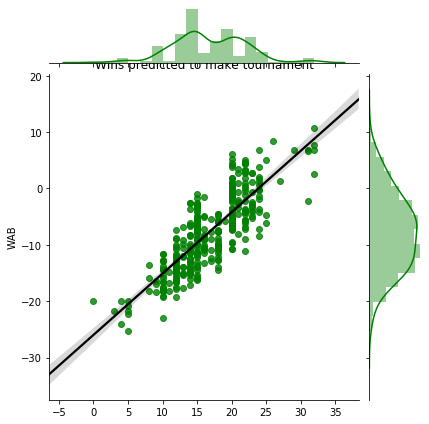

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.jointplot(wins_pred,cbb2020['WAB'],kind='reg',color='green',joint_kws={'line_kws':{'color':'black'}})
plt.title('Wins predicted to make tournament')

This graph is the predicted wins it takes to make the NCAA tournament. The cutoff is zero but is not limited to zero. By this graph the estimated wins it takes to make the tournament is about 23 wins.

In [10]:
power_list = ['B12','B10','ACC','BE','P12','SEC']
p5confs = cbb2020[cbb2020['CONF'].isin(power_list)]
p5confs

,RK,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,...,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB
0,1,Kansas,B12,30,28,116.1,87.7,0.9616,53.7,43.7,...,32.6,26.4,35.8,23.2,54.9,42.4,34.1,30.5,67.4,10.8
1,2,Baylor,B12,30,26,114.5,88.4,0.9513,49.4,45.2,...,35.8,29.8,30.8,30.8,47.5,44.4,35.1,31.1,66.2,8.5
4,5,Michigan St.,B10,31,22,114.8,91.3,0.9326,52.6,43.3,...,32.8,26.0,30.8,29.3,52.9,43.4,34.8,28.7,69.3,5.2
5,6,Duke,ACC,31,25,115.3,91.9,0.9310,52.6,45.7,...,34.8,28.0,35.6,30.9,52.5,46.0,35.2,29.9,71.7,5.1
6,7,Creighton,BE,30,24,120.6,96.4,0.9289,55.2,48.4,...,23.9,30.2,28.8,23.4,53.0,48.9,38.7,31.8,68.3,6.1
7,8,Ohio St.,B10,31,21,114.6,92.6,0.9200,52.3,46.2,...,31.1,25.5,36.7,29.3,49.7,44.2,37.3,32.7,66.2,3.8
8,9,Louisville,ACC,31,24,115.1,93.9,0.9120,52.5,45.1,...,32.0,25.0,32.2,29.0,50.1,45.1,37.6,30.1,66.9,4.3
10,11,Villanova,BE,31,24,114.0,93.7,0.9045,52.6,48.2,...,25.7,24.5,26.9,23.6,51.5,47.9,35.9,32.5,66.2,6.8
12,13,Arizona,P12,32,21,110.9,91.2,0.9040,50.7,45.3,...,30.7,25.9,36.7,35.2,49.6,44.4,35.2,31.2,69.3,0.8
13,14,Michigan,B10,31,19,113.0,93.1,0.9028,52.8,46.9,...,25.0,25.5,26.7,26.4,54.1,46.3,33.9,32.3,68.6,2.8


These graphs show the Power Ratings by power conference (1) and by team in those conferences (2).

C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Text(0.5, 1.0, 'Average Power rating by Power Conferences')

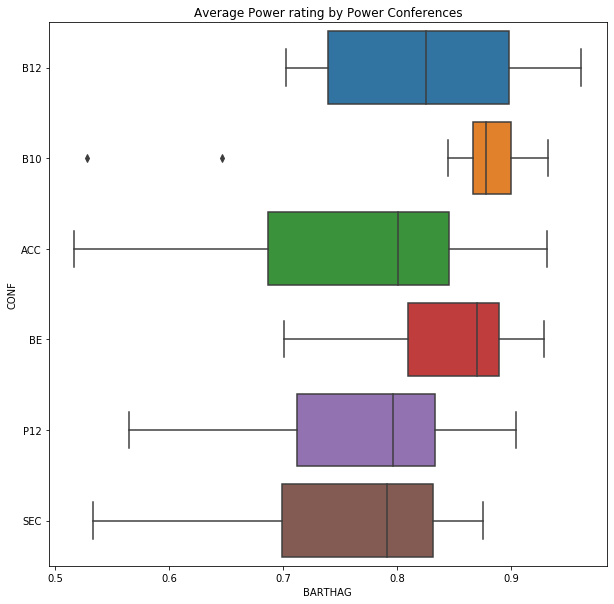

In [11]:
features_train = cbb2020[['ADJOE','ADJDE','BARTHAG','EFG_O','EFG_D','TOR','TORD','ORB','DRB','FTR','FTRD','2P_O','2P_D','3P_O','3P_D','ADJ_T','WAB']]
target_train = cbb2020[['W']]
features_test = p5confs[['ADJOE','ADJDE','BARTHAG','EFG_O','EFG_D','TOR','TORD','ORB','DRB','FTR','FTRD','2P_O','2P_D','3P_O','3P_D','ADJ_T','WAB']]
target_test = p5confs[['W']]

log_reg = LogisticRegression().fit(features_train, target_train)
wins_pred = log_reg.predict(features_test)
accuracy = accuracy_score(target_test, wins_pred)

plt.figure(figsize=(10,10))
sns.boxplot(p5confs['BARTHAG'],p5confs['CONF'])
plt.title('Average Power rating by Power Conferences')

Text(0.5, 1, 'Power rating by team in power conferences')

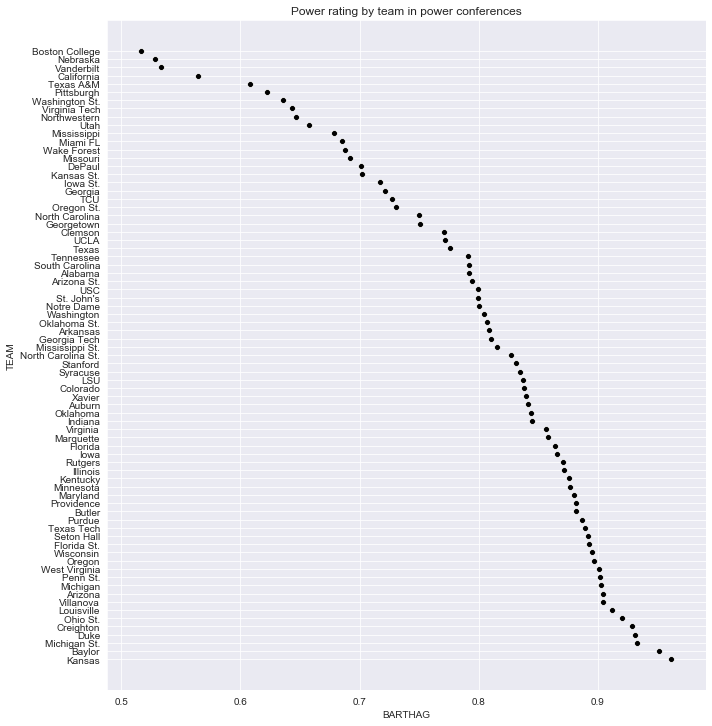

In [12]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.scatterplot(p5confs['BARTHAG'],p5confs['TEAM'],color='black')
plt.tight_layout()
plt.title('Power rating by team in power conferences')


Power rating just in the BIG 10

In [14]:
big10 = ['Michigan St.','Ohio St.','Indiana','Iowa','Illinois','Rutgers','Michigan','Minnesota','Maryland','Purdue',
         'Wisconsin','Penn St.','Northwestern','Nebraska']
b10 = cbb2020[cbb2020['TEAM'].isin(big10)]
b10

,RK,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,...,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB
4,5,Michigan St.,B10,31,22,114.8,91.3,0.9326,52.6,43.3,...,32.8,26.0,30.8,29.3,52.9,43.4,34.8,28.7,69.3,5.2
7,8,Ohio St.,B10,31,21,114.6,92.6,0.9200,52.3,46.2,...,31.1,25.5,36.7,29.3,49.7,44.2,37.3,32.7,66.2,3.8
13,14,Michigan,B10,31,19,113.0,93.1,0.9028,52.8,46.9,...,25.0,25.5,26.7,26.4,54.1,46.3,33.9,32.3,68.6,2.8
14,15,Penn St.,B10,31,21,111.4,91.9,0.9019,49.5,46.4,...,29.2,27.6,31.0,31.8,50.0,45.2,32.5,32.5,70.9,3.4
18,19,Wisconsin,B10,31,21,110.9,92.0,0.8952,50.3,46.4,...,24.1,25.9,26.9,25.3,48.3,44.9,35.2,33.1,63.5,4.2
22,23,Purdue,B10,31,16,109.6,91.6,0.8870,47.8,47.1,...,34.9,27.2,25.8,31.9,46.7,48.1,33.0,30.5,64.3,-0.6
25,26,Maryland,B10,31,24,112.6,94.7,0.8797,48.6,46.1,...,31.5,26.6,37.7,24.2,50.1,44.5,31.1,32.5,67.1,6.8
26,27,Minnesota,B10,31,15,111.9,94.4,0.8764,49.4,45.6,...,31.3,27.9,27.5,28.0,48.6,45.4,33.7,30.7,66.8,-1.5
28,29,Illinois,B10,30,21,110.9,93.9,0.8719,48.3,47.0,...,35.6,25.7,32.2,23.9,49.6,45.8,30.3,33.0,66.3,3.0
29,30,Rutgers,B10,30,20,107.5,91.0,0.8711,48.9,45.1,...,32.0,25.4,29.1,27.5,50.1,43.8,30.8,31.2,67.3,1.6


Text(0.5, 1.0, 'Power Rating BIG 10')

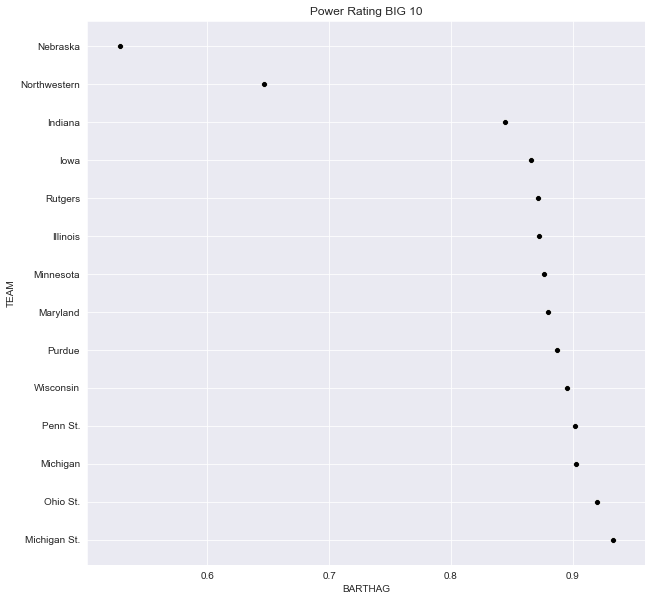

In [15]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.scatterplot(b10['BARTHAG'],b10['TEAM'],color='black')
plt.title('Power Rating BIG 10')

Predicted wins for BIG 10 teams.


C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Text(0.5, 1.0, 'Predicted wins BIG10')

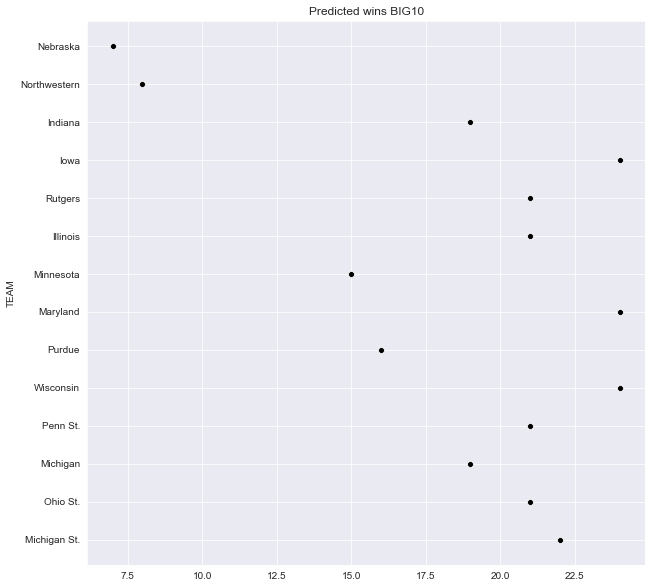

In [16]:
features_train = p5confs[['ADJOE','ADJDE','BARTHAG','EFG_O','EFG_D','TOR','TORD','ORB','DRB','FTR','FTRD','2P_O','2P_D','3P_O','3P_D','ADJ_T','WAB']]
target_train = p5confs[['W']]
features_test = b10[['ADJOE','ADJDE','BARTHAG','EFG_O','EFG_D','TOR','TORD','ORB','DRB','FTR','FTRD','2P_O','2P_D','3P_O','3P_D','ADJ_T','WAB']]
target_test = b10[['W']]

log_reg = LogisticRegression().fit(features_train, target_train)
wins_pred = log_reg.predict(features_test)
accuracy = accuracy_score(target_test, wins_pred)

plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.scatterplot(wins_pred,b10['TEAM'],color='black')
plt.title('Predicted wins BIG10')

Power rating for teams who have made the Elite 8 or further in the past 6 years.

In [18]:
post = ['2ND','Champions','F4','E8']
post2 = cbb[cbb['POSTSEASON'].isin(post)]
post2

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
5,Duke,ACC,39,35,125.2,90.6,0.9764,56.6,46.5,16.3,...,23.9,55.9,46.3,38.7,31.4,66.4,10.7,Champions,1.0,2015
6,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,26.3,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0,2019
7,North Carolina,ACC,39,33,121.0,91.5,0.9615,51.7,48.1,16.2,...,31.6,51.0,46.3,35.5,33.9,72.8,8.4,Champions,1.0,2017
8,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
9,Villanova,BE,40,36,128.4,94.1,0.9725,59.5,48.5,15.0,...,26.7,59.0,49.0,40.1,31.7,69.6,10.6,Champions,1.0,2018


In [19]:
features_train = cbb2020[['ADJOE','ADJDE','BARTHAG','EFG_O','EFG_D','TOR','TORD','ORB','DRB','FTR','FTRD','2P_O','2P_D','3P_O','3P_D','ADJ_T','WAB']]
target_train = cbb2020[['W']]
features_test = post2[['ADJOE','ADJDE','BARTHAG','EFG_O','EFG_D','TOR','TORD','ORB','DRB','FTR','FTRD','2P_O','2P_D','3P_O','3P_D','ADJ_T','WAB']]
target_test = post2[['W']]

log_reg = LogisticRegression().fit(features_train, target_train)
wins_pred = log_reg.predict(features_test)
accuracy = accuracy_score(target_test, wins_pred)

C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Text(0.5, 1, 'Power Ratings Past Elite 8 teams')

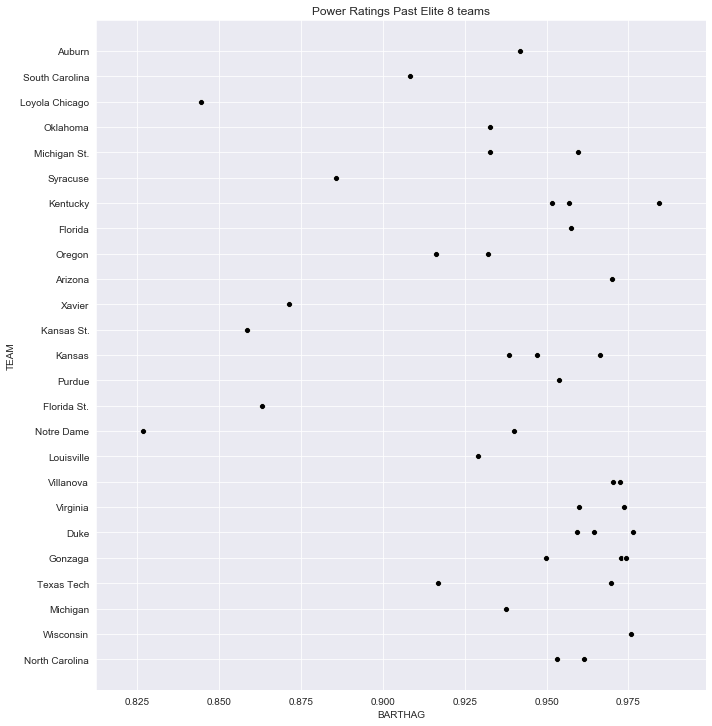

In [20]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.scatterplot(post2['BARTHAG'],post2['TEAM'],color='black')
plt.tight_layout()
plt.title('Power Ratings Past Elite 8 teams')

What we learned overall isit’s very hard to predict sports wins, as there are many factors that are difficult or impossible to accurately calculate.
Some of those include: luck, coaching ability, a team’s ability to handle pressure, individual player injuries, and players or teams simply having “off nights”.
To improve our model we could add more statistics and add weights to certain statistics we believe affect the prediction accuracy the most.
This would be very difficult to determine, and in most cases would require us to come up with a completely new model to make the machine learning prediction.
